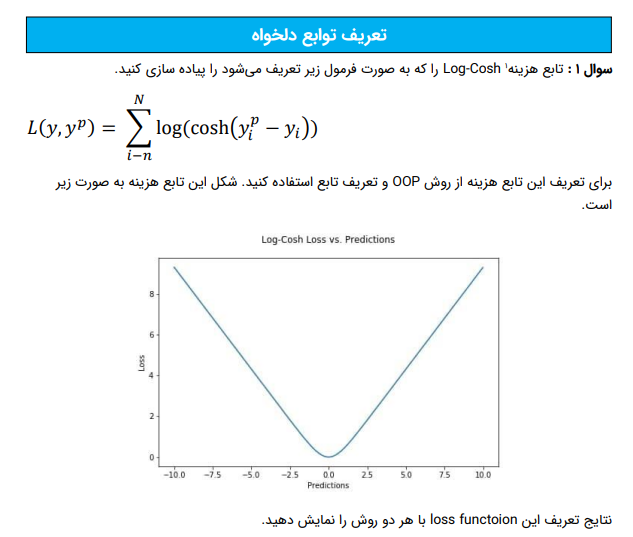

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
from tensorflow.keras import layers, models

class HouseNet():

    @staticmethod
    def build():
        bathroom_input = layers.Input((32, 32, 3))

        x = layers.Conv2D(16, (3, 3), padding="same",activation="relu")(bathroom_input)
        x = layers.MaxPool2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(x)
        x = layers.MaxPool2D((2, 2))(x)

        bedroom_input = layers.Input((32, 32, 3))
        y = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(bedroom_input)
        y = layers.MaxPool2D((2, 2))(y)
        y = layers.Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(y)
        y = layers.MaxPool2D((2, 2))(y)

        frontal_input = layers.Input((32, 32, 3))
        z = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(frontal_input)
        z = layers.MaxPool2D((2, 2))(z)
        z = layers.Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(z)
        z = layers.MaxPool2D((2, 2))(z)

        kitchen_input = layers.Input((32, 32, 3))
        w = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(kitchen_input)
        w = layers.MaxPool2D((2, 2))(w)
        w = layers.Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(w)
        w = layers.MaxPool2D((2, 2))(w)
        

        concat_inputs = layers.concatenate([x, y, z, w], axis = 2)
        flat_layer = layers.Flatten()(concat_inputs)
        out = layers.Dense(100, activation="relu", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(flat_layer)
        out = layers.Dense(50, activation="relu" )(out)
        out = layers.Dense(1, activation="linear")(out)

        net = models.Model(
            inputs=[bathroom_input, bedroom_input, frontal_input, kitchen_input], outputs=out)

        return net

    @staticmethod
    def load_model():
        pass

    @staticmethod
    def save_model():
        pass

- Defenition:

**Log-Cosh Loss**

Advantage: log(cosh(x)) is approximately equal to (x ** 2) / 2 for small x and to abs(x) - log(2) for large x . This means that 'logcosh' works mostly like the mean squared error, but will not be so strongly affected by the occasional wildly incorrect prediction.

we review 3 way to Define our Loss function:

1 - function

2 - function-to-function

3 - OOP

- first approach (function)

In [2]:
def Log_Cosh_loss(y_true, y_pred):

    error = tf.math.log(tf.math.cosh(y_true - y_pred, name=None))
    return tf.reduce_mean(error , axis = -1)

- Second Approach(OOP) ==> have to Define a Class

In [3]:
import keras
from  keras.losses import Loss

class LogCoshLoss(Loss):

  def __init__ (self):
    super().__init__()

  def call(self, y_true, y_pred):
    error = y_true - y_pred
    error = tf.math.log(tf.math.cosh(error, name=None))
    return tf.reduce_mean(error , axis = -1)

In [4]:
import cv2
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

bathroom_list = []
bedroom_list = []
frontal_list = []
kitchen_list = []
label_list = []
txt_dir = '/content/drive/MyDrive/session2/Multi Input Classification/Multi Input Classification/HousesInfo.txt'
df = pd.read_csv(txt_dir, sep = " ",
                    names=["col_1", "col_2", "col_3", "col_4", "price"])

labels = np.array(df.loc[:, "price"])

labels = labels/np.max(labels)
#print('price:', labels)

def preprocess(img):

        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255.0

        return img
dir = '/content/drive/MyDrive/session2/Multi Input Classification/Multi Input Classification/house_dataset//*.jpg'
for i, item in enumerate(glob.glob(dir)):
        
    image = cv2.imread(item)
    image = preprocess(image)
    location = item.split("/")[-1].split("_")[-1].split(".")[0]   #item = file directory
    #print(location)

    if   location == "bathroom": bathroom_list.append(image)
    elif location == "bedroom": bedroom_list.append(image)
    elif location == "frontal": frontal_list.append(image)
    elif location == "kitchen": kitchen_list.append(image)

    if i % 100 == 0:
        print("[INFO]: {}/2500 processed".format(i))

bathroom_list = np.array(bathroom_list)
bedroom_list = np.array(bedroom_list)
frontal_list = np.array(frontal_list)
kitchen_list = np.array(kitchen_list)

split = train_test_split(bathroom_list, bedroom_list,
                         frontal_list, kitchen_list,labels,  test_size=0.2)

(bathroom_train, bathroom_test, bedroom_train, bedroom_test, 
 frontal_train, frontal_test, kitchen_train, kitchen_test, labels_train, labels_test) = split
print(len(labels_test))



[INFO]: 0/2500 processed
[INFO]: 100/2500 processed
[INFO]: 200/2500 processed
[INFO]: 300/2500 processed
[INFO]: 400/2500 processed
[INFO]: 500/2500 processed
[INFO]: 600/2500 processed
[INFO]: 700/2500 processed
[INFO]: 800/2500 processed
[INFO]: 900/2500 processed
[INFO]: 1000/2500 processed
[INFO]: 1100/2500 processed
[INFO]: 1200/2500 processed
[INFO]: 1300/2500 processed
[INFO]: 1400/2500 processed
[INFO]: 1500/2500 processed
[INFO]: 1600/2500 processed
[INFO]: 1700/2500 processed
[INFO]: 1800/2500 processed
[INFO]: 1900/2500 processed
[INFO]: 2000/2500 processed
[INFO]: 2100/2500 processed
107


- first approach result:(function)

Epoch 1/40
14/14 [==============================] - 3s 142ms/step - loss: 78.7990 - val_loss: 38.0867
Epoch 2/40
14/14 [==============================] - 2s 118ms/step - loss: 23.2708 - val_loss: 15.4053
Epoch 3/40
14/14 [==============================] - 2s 119ms/step - loss: 11.8278 - val_loss: 8.1990
Epoch 4/40
14/14 [==============================] - 2s 128ms/step - loss: 6.5295 - val_loss: 4.7390
Epoch 5/40
14/14 [==============================] - 2s 124ms/step - loss: 3.9626 - val_loss: 3.0915
Epoch 6/40
14/14 [==============================] - 2s 119ms/step - loss: 2.5873 - val_loss: 2.0762
Epoch 7/40
14/14 [==============================] - 2s 120ms/step - loss: 1.7680 - val_loss: 1.4427
Epoch 8/40
14/14 [==============================] - 2s 119ms/step - loss: 1.2773 - val_loss: 1.1407
Epoch 9/40
14/14 [==============================] - 2s 121ms/step - loss: 1.1237 - val_loss: 1.1208
Epoch 10/40
14/14 [==============================] - 2s 119ms/step - loss: 1.0829 - val_loss: 1

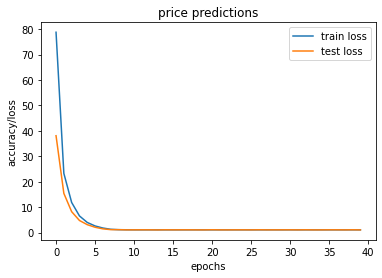

In [10]:
net = HouseNet.build()

net.compile(optimizer="adam",
            loss = Log_Cosh_loss)


H = net.fit(x = [bathroom_train, bedroom_train, frontal_train, kitchen_train],
            y = labels_train,
            validation_data = ( [bathroom_test, bedroom_test, frontal_test, kitchen_test], labels_test),
            epochs=40,
            verbose = 1)

plt.plot(H.history["loss"], label="train loss")
plt.plot(H.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("price predictions")
plt.show()

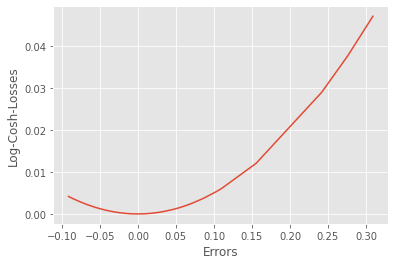

In [11]:
# example of increase in mean squared error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# real value (test_part botem)
y_true = np.array(labels_test)
# predicted value
y_pred = net.predict([bathroom_test, bedroom_test, frontal_test, kitchen_test])
y_pred = np.array(y_pred).squeeze()
# calculate errors and loss
log_cosh_losses = list()
errors = list()
for i in range(len(y_pred)):
    # calculate error
    error = y_true[i] - y_pred[i]
    #print(error) #sanity-cheak
    #calculate_loss
    loss=np.log(np.cosh(error))
    # store loss and errors
    log_cosh_losses.append(loss)
    errors.append(error)
df = pd.DataFrame( {'error':errors , 'log_cosh_loss': log_cosh_losses})
df = df.sort_values(by = 'error', ascending=True)
# plot errors
plt.plot(df.loc[:, "error"],df.loc[:, "log_cosh_loss"])
plt.xlabel('Errors')
plt.ylabel('Log-Cosh-Losses')
plt.show()

- second approach(OOP)

Epoch 1/40
14/14 [==============================] - 3s 152ms/step - loss: 78.8862 - val_loss: 38.1469
Epoch 2/40
14/14 [==============================] - 2s 128ms/step - loss: 23.3117 - val_loss: 15.4623
Epoch 3/40
14/14 [==============================] - 2s 121ms/step - loss: 11.8720 - val_loss: 8.2333
Epoch 4/40
14/14 [==============================] - 2s 122ms/step - loss: 6.5568 - val_loss: 4.7661
Epoch 5/40
14/14 [==============================] - 2s 125ms/step - loss: 3.9769 - val_loss: 3.0970
Epoch 6/40
14/14 [==============================] - 2s 124ms/step - loss: 2.5916 - val_loss: 2.0766
Epoch 7/40
14/14 [==============================] - 2s 123ms/step - loss: 1.7630 - val_loss: 1.4340
Epoch 8/40
14/14 [==============================] - 2s 127ms/step - loss: 1.2725 - val_loss: 1.1399
Epoch 9/40
14/14 [==============================] - 2s 125ms/step - loss: 1.1200 - val_loss: 1.1130
Epoch 10/40
14/14 [==============================] - 2s 127ms/step - loss: 1.0776 - val_loss: 1

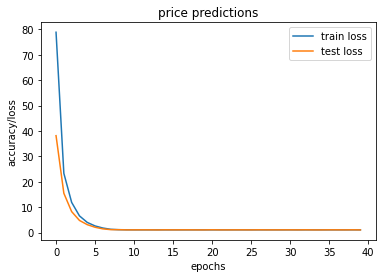

In [5]:
net = HouseNet.build()

net.compile(optimizer="adam",
            loss = LogCoshLoss())

H = net.fit(x = [bathroom_train, bedroom_train, frontal_train, kitchen_train],
            y = labels_train,
            validation_data = ( [bathroom_test, bedroom_test, frontal_test, kitchen_test], labels_test),
            epochs=40,
            verbose = 1)

plt.plot(H.history["loss"], label="train loss")
plt.plot(H.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("price predictions")
plt.show()

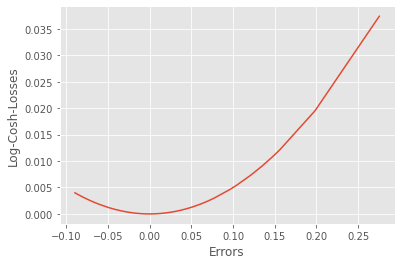

In [6]:
# example of increase in mean squared error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# real value (test_part botem)
y_true = np.array(labels_test)
# predicted value
y_pred = net.predict([bathroom_test, bedroom_test, frontal_test, kitchen_test])
y_pred = np.array(y_pred).squeeze()
# calculate errors and loss
log_cosh_losses = list()
errors = list()
for i in range(len(y_pred)):
    # calculate error
    error = y_true[i] - y_pred[i]
    #print(error) #sanity-cheak
    #calculate_loss
    loss=np.log(np.cosh(error))
    # store loss and errors
    log_cosh_losses.append(loss)
    errors.append(error)
df = pd.DataFrame( {'error':errors , 'log_cosh_loss': log_cosh_losses})
df = df.sort_values(by = 'error', ascending=True)
# plot errors
plt.plot(df.loc[:, "error"],df.loc[:, "log_cosh_loss"])
plt.xlabel('Errors')
plt.ylabel('Log-Cosh-Losses')
plt.show()
